## SCRAPING SITO DEL CENTRO RICERCA SEMEION

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://www.semeion.it/wordpress/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Home - Semeion


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res

['http://www.semeion.it/wordpress/line-hate-speech/',
 'http://www.semeion.it/wordpress/graphs/',
 'http://www.semeion.it/wordpress/theory-of-impossible-worlds/',
 'http://www.semeion.it/wordpress/2019/10/30/riformista-la-proposta-dei-ricercatori-ingv-evacuare-la-zona-rossa-limitare-danni/',
 'http://www.semeion.it/wordpress/bimodal/',
 'http://www.semeion.it/wordpress/ministero-delluniversita/',
 'http://www.semeion.it/wordpress/collaborazioni-ministeri-governo/',
 'http://www.semeion.it/wordpress/cc-crowd-clusering-algorithm/',
 'http://www.semeion.it/wordpress/unsupervised-anns/',
 'http://www.semeion.it/wordpress/318-2/',
 'http://www.semeion.it/wordpress/semeion/',
 'http://www.semeion.it/wordpress/guacamolesemeion/',
 'http://www.semeion.it/wordpress/2019/12/02/master-nuove-tecnologie-la-pianificazione/',
 'http://www.semeion.it/wordpress/explorative-analytics-networks-references/',
 'http://www.semeion.it/wordpress/unsupervised-algorithms-simulation/',
 'http://www.semeion.it/wo

In [4]:
matchers = ['artificial-intelligence','projects']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['http://www.semeion.it/wordpress/2020/03/17/artificial-intelligence-precision-health-from-concept-to-applications/',
 'http://www.semeion.it/wordpress/2020/10/10/artificial-intelligence-to-design-collaborative-strategy-an-application-to-urban-destinations/',
 'http://www.semeion.it/wordpress/2020/02/17/artificial-intelligence-at-the-service-of-business-people/',
 'http://www.semeion.it/wordpress/2020/09/08/artificial-intelligence-academy-5-30-pm-thursday-10-september-semeion-intervention-registration-for-live-streaming-is-open/',
 'http://www.semeion.it/wordpress/2020/09/11/artificial-intelligence-academy-semeion-talk/']

In [5]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Artificial Intelligence in Precision Health : From Concept to Applications - Semeion',
 'Artificial intelligence to design collaborative strategy: An application to urban destinations - Semeion',
 'Intelligenza Artificiale a Servizio di chi fa Impresa - 19 Febbraio - Semeion',
 'Artificial Intelligence Academy - 17,30 giovedì 10 settembre - Conferenza del Semeion - Sono aperte le iscrizioni per la diretta streaming - Semeion',
 'Artificial Intelligence Academy – Conferenza del Semeion – video della diretta - Semeion']

In [6]:
texts[0]

'\n\n\n\n\nArtificial Intelligence in Precision Health : From Concept to Applications\n\n17 marzo 202017 marzo 2020  \n\n\nEnzo Grossi, Giulia Massini, Massimo Buscema.\nMachine learning systems and precision\xa0medicine: A conceptual and experimental\xa0approach to single individual statistics.\nChapter 4 , Publication date\xa013 Mar 2020\n\xa0\n\n\n\n\nArtificial Intelligence in Precision Health: From Concept to Applications provides a readily available resource to understand artificial intelligence and its real time applications in precision medicine in practice. Written by experts from different countries and with diverse background, the content encompasses accessible knowledge easily understandable for non-specialists in computer sciences. The book discusses topics such as cognitive computing and emotional intelligence, big data analysis, clinical decision support systems, deep learning, personal omics, digital health, predictive models, prediction of epidemics, drug discovery, pr

In [7]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [8]:
texts2[0]

'     Artificial Intelligence in Precision Health : From Concept to Applications  17 marzo 202017 marzo 2020     Enzo Grossi, Giulia Massini, Massimo Buscema. Machine learning systems and precision medicine: A conceptual and experimental approach to single individual statistics. Chapter 4 , Publication date 13 Mar 2020       Artificial Intelligence in Precision Health: From Concept to Applications provides a readily available resource to understand artificial intelligence and its real time applications in precision medicine in practice. Written by experts from different countries and with diverse background, the content encompasses accessible knowledge easily understandable for non-specialists in computer sciences. The book discusses topics such as cognitive computing and emotional intelligence, big data analysis, clinical decision support systems, deep learning, personal omics, digital health, predictive models, prediction of epidemics, drug discovery, precision nutrition and fitness.

In [9]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [10]:
texts3[0]

'Artificial Intelligence in Precision Health : From Concept to 17 202017 2020 , , . Machine learning and precision medicine : A conceptual and experimental approach to single individual statistics . Chapter 4 , Publication date 13 Mar 2020 Artificial Intelligence in Precision Health : From Concept to a readily available resource to understand artificial intelligence and its real time in precision medicine in practice . Written by from different and with diverse background , the content accessible knowledge easily understandable for non - in computer . The book such as cognitive and emotional intelligence , big data analysis , clinical decision support , deep learning , personal , digital health , predictive , prediction of , drug discovery , precision nutrition and fitness . Additionally , there is a section to discuss and analyze AI related to precision already available . a di chi fa Impresa – 19 Virus dynamics by Method – 25 19 march Search for : . qtranxs_widget { margin : 0 ; } . 

### TEXT CLEANING

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

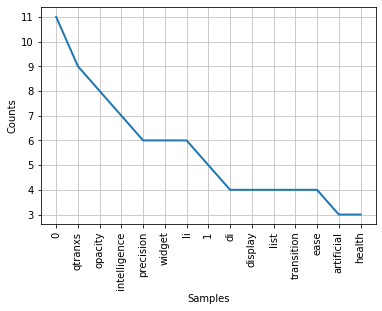

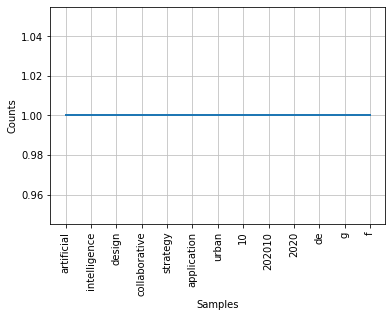

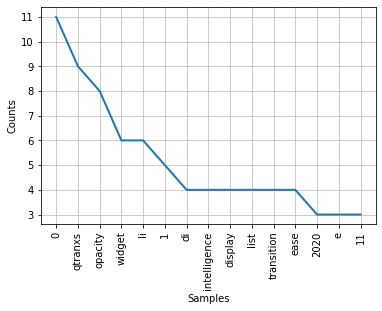

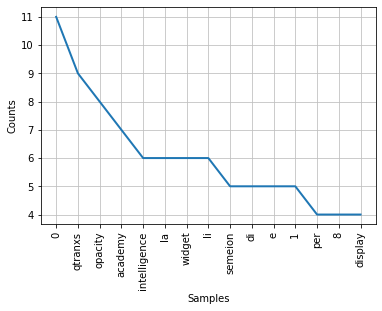

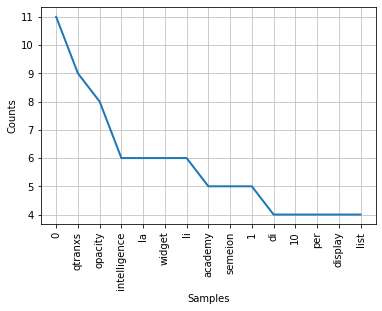

In [13]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [14]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Artificial Intelligence in Precision Health : ...,"{'artificial': 3, 'intelligence': 7, 'precisio..."
1,Artificial intelligence to design collaborativ...,"{'artificial': 1, 'intelligence': 1, 'design':..."
2,Intelligenza Artificiale a Servizio di chi fa ...,"{'di': 4, 'chi': 1, 'fa': 1, 'impresa': 1, '19..."
3,"Artificial Intelligence Academy - 17,30 gioved...","{'artificial': 2, 'intelligence': 6, 'academy'..."
4,Artificial Intelligence Academy – Conferenza d...,"{'artificial': 3, 'intelligence': 6, 'academy'..."


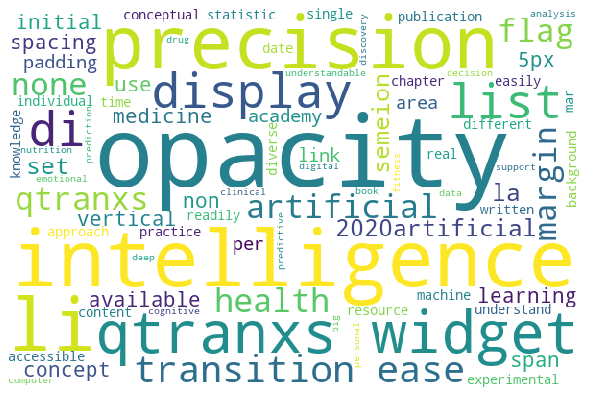

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [16]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [17]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

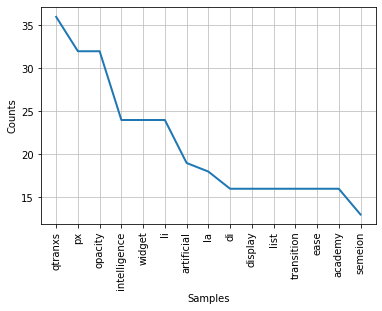

In [18]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [19]:
textfile = open('Semeion.txt', 'w')
textfile.write(tot_text)
textfile.close()

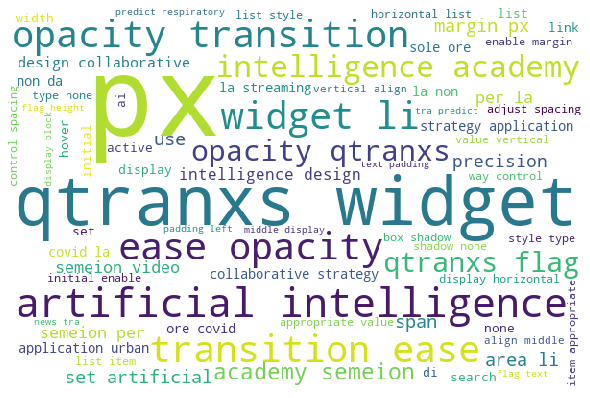

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()